# Matemática Computacional I
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

## Derivação numérica

Muitos sistemas estudados em ciência e engenharia variam no espaço, no tempo ou em função de alguma outra variável. Na matemática, as derivadas são usadas para modelar e descrever essas mudanças. A derivada de uma função representa da taxa de variação de uma variável dependente em relação a uma variável independente. A partir do cálculo, muitas fórmulas e métodos para derivar funções podem ser desenvolvidos. Porém, em em alguns casos, a função de interesse pode não ter sua expressão analítica conhecida, ser difícil de manejar, ou ainda, ser expressa por por meio de um conjunto discreto de pontos. Nesses e em outros casos é possível obter derivadas da função numericamente ao invés de analiticamente.

A derivada de uma função $f(x)$ no ponto $x=p$ é definida como:

$$f'(p) = \lim\limits_{x \to p}\frac{f(x) - f(p)}{x-p}$$

A derivada de 1ª ordem em $x=p$ é a inclinação da reta tangente à função neste ponto, ou simplesmente, a inclinação da função. Assim, a derivada informa sobre a taxa de variação instantânea da função $y=f(x)$ em relação à variação de $x$ no ponto quando $x=p$.

Além disso, tomando $p$ suficientemente próximo de $x$ podemos facilmente inferir que uma boa aproximação para o valor da derivada 1ª de $f$ em $x$ será dada por

$$f'(p) \approx \frac{f(x) - f(p)}{x-p}$$

Essa fórmula fornece um valor aproximado para a inclinação da reta tangente usando a inclinação da reta secante à $f$ que intercepta o gráfico nos pontos $(x,f(x))$ e $(p, f(p))$.  

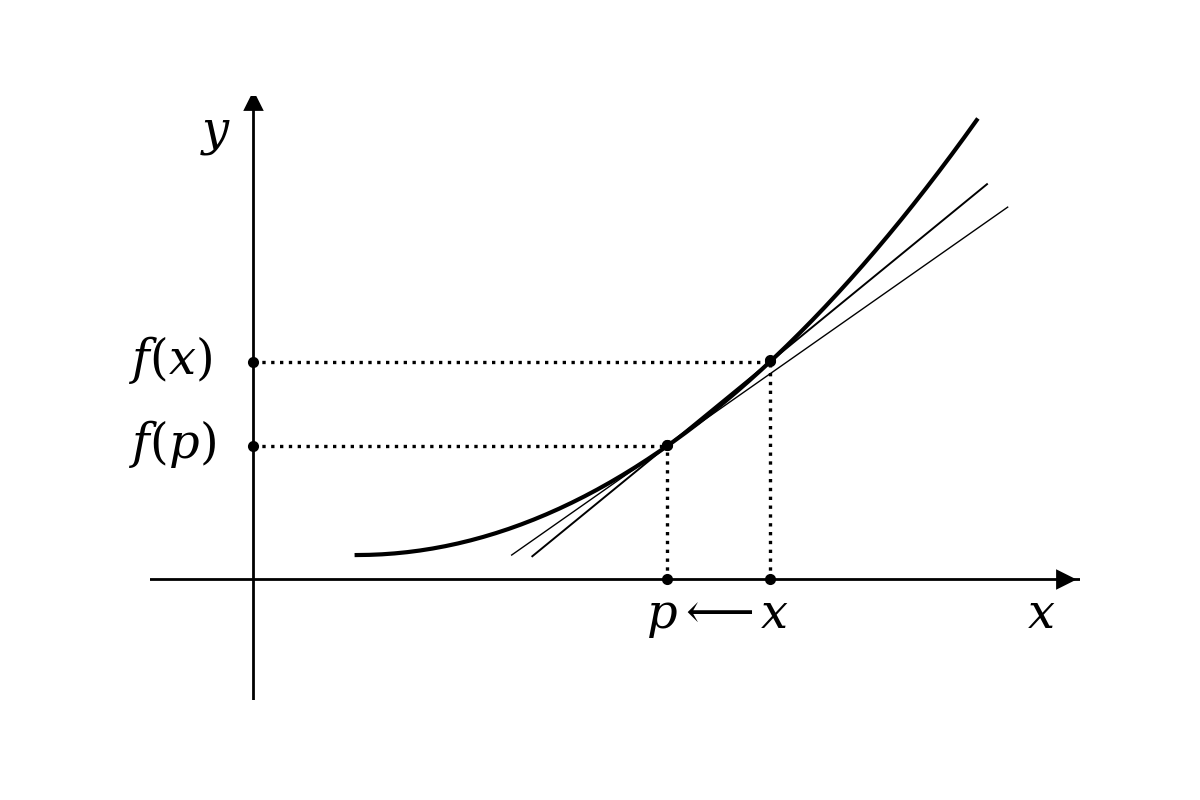

Figura 1 - Interpretação geométrica da derivada


Podemos concluir facilmente que quanto mais próximo o ponto $p$ estiver de $x$, mais próxima a inclinação da reta secante estará da reta tangente. Em outras palavras, quanto menor o valor de $h=x-p$ melhor a aproximação obtida.

Obter numericamente aproximações para a derivada de uma função muitas vezes requer discretizar uma região do domínio, o que significa, tomar um conjunto finito de pontos chamado de malha ou _grid_. No caso de uma função de uma variável $y=f(x)$, podemos tomar $n+1$ pontos $x_i$, $i=0,1,...,n$ no intervalo $[x_0,x_n]$ como mostra a figura abaixo.

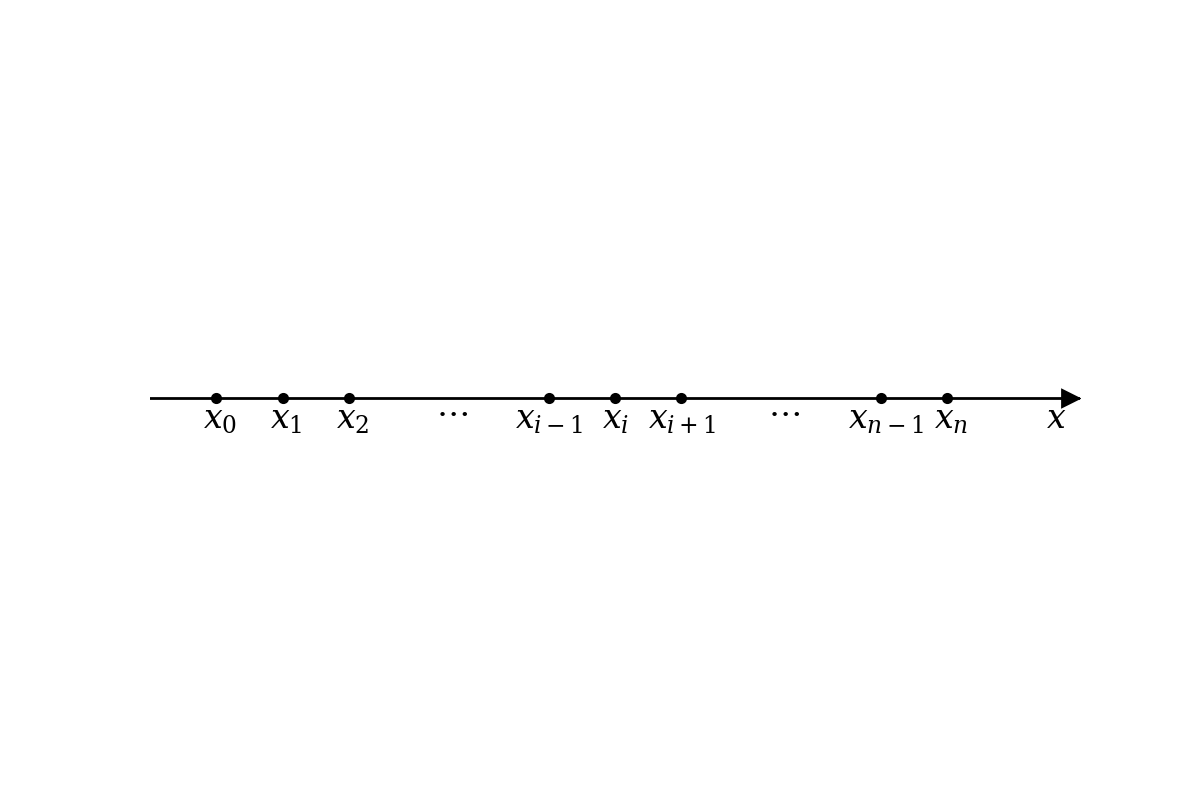
Figura 2 - Discretização de um intervalo do domínio da função

### Derivada numérica de 1ª ordem em uma variável

A aproximação numérica para a derivada de 1ª ordem de uma função $y=f(x)$ em um ponto $x_i$ pode ser obtida por diferença finita, em que a inclinação da função é estimada usando valores da função na vizinhança do ponto.

Chamamos aproximação _**para frente**_ quando se estima $f'(x_i)$ usando a inclinação da reta secante que passa pelos pontos $(x_i, f(x_i))$ e $(x_{i+1}, f(x_{i+1}))$. A aproximação _**para trás**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i}, f(x_{i}))$. E a aproximação _**central**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i+1}, f(x_{i+1}))$.

A seguir são mostradas as fórmulas e uma representação geométrica  que ilustra a aproximação de $f'(x_i)$ _para frente_, _para trás_ e _central_ respectivamente:


$f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_i)}{x_{i+1}-x_i}$
$f'(x_i) \simeq \frac{f(x_{i}) - f(x_{i-1})}{x_i-x_{i-1}}$
$f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1}-x_{i-1}}$


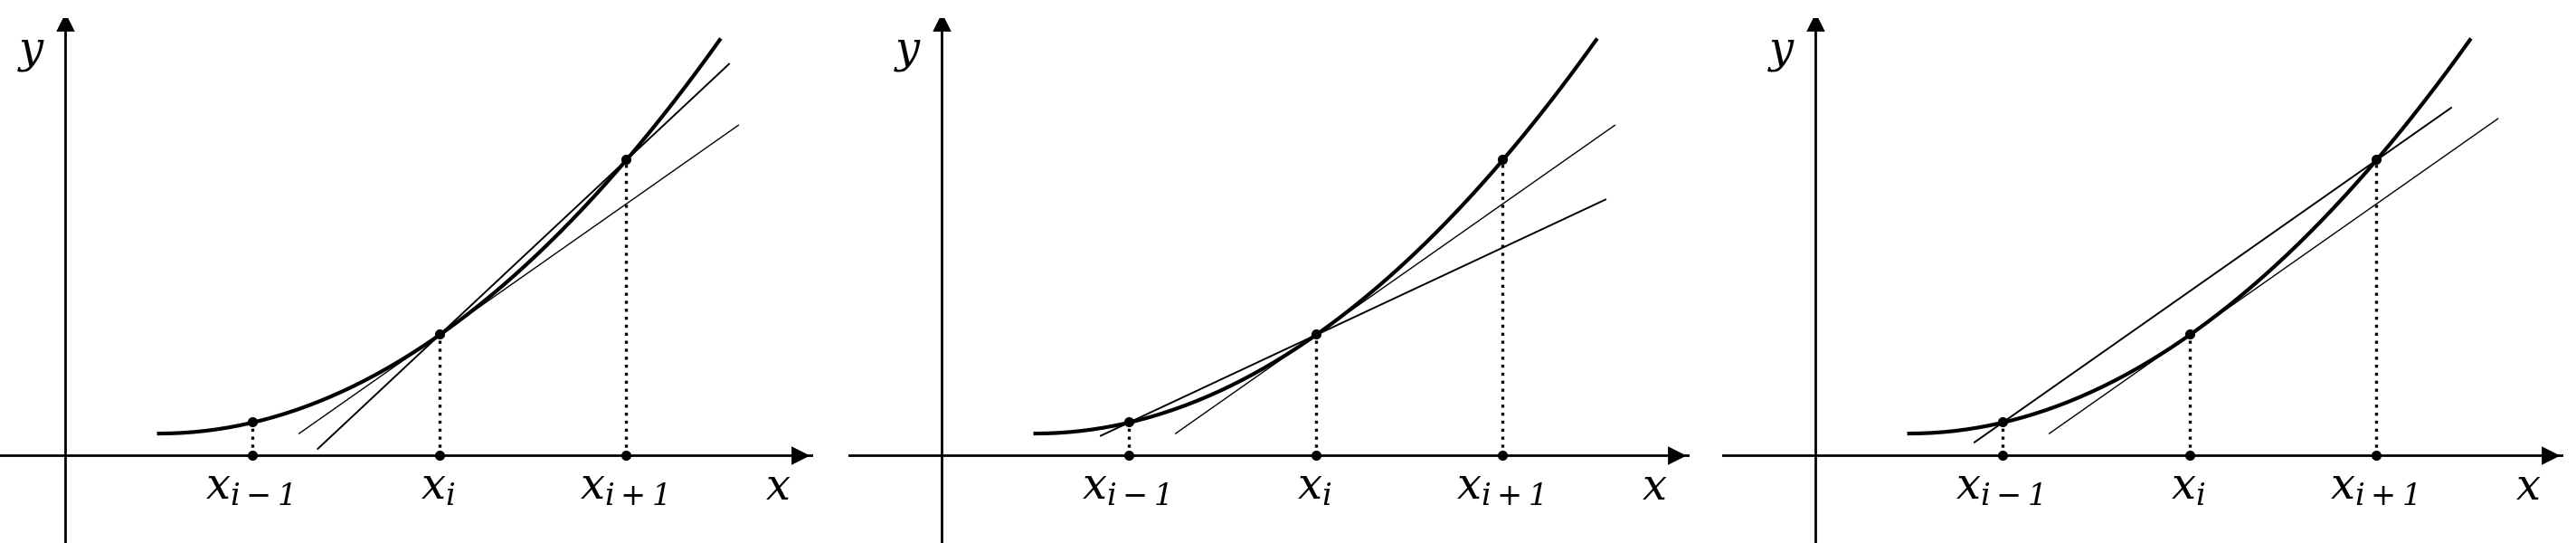
Figura 3 Fórmulas de derivação numérica

As fórmulas de diferenças finitas mostradas acima podem ser obtidas a partir da série de Taylor para a função $f(x)$ desenvolvida em torno de $x=x_i$.

Em termos de $h$ as fórmulas de aproximação por diferenças finitas ficam com as segiuntes formas:

- _Para frente_: $f'(x_i)\approx\frac{f(x_{i+1})-f(x_i)}{h}$


- _Para trás_: $f'(x_i)\approx\frac{f(x_{i})-f(x_{i-1})}{h}$


- _Central_: $f'(x_i)\approx\frac{f(x_{i+1})-f(x_{i-1})}{2h}$

**Exemplo 1:**

Sabemos que a derivada primeira de $f(x)=sen(x)$ é $f'(x)=cos(x)$. Vamos calcular as derivadas numericamente usando as fórmulas de diferenças finitas _para frente_, _central_ e _para trás_ no intervalo $[0,2\pi]$ discretizado em 21 pontos.

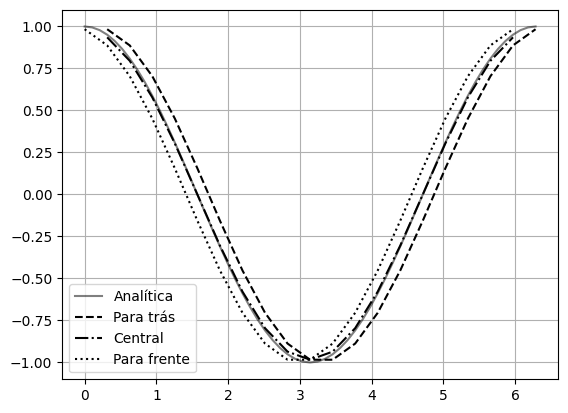

In [ ]:
xi = np.linspace(0, 2*np.pi, 21)
h  = (xi[-1]-xi[0])/(len(xi)-1)
f  = lambda x: np.sin(x)

dxit = (f(xi[1:])-f(xi[0:-1]))/h
dxic = (f(xi[2:])-f(xi[0:-2]))/(2*h)

xplot = np.linspace(0, 2*np.pi, 61)

plt.plot(xplot,np.cos(xplot),'-k',
         alpha=0.5,label='Analítica')
plt.plot(xi[1:],dxit,'--k',label='Para trás')
plt.plot(xi[1:-1],dxic,'-.k',label='Central')
plt.plot(xi[0:-1],dxit,':k',label='Para frente')

plt.grid()
plt.legend()
plt.show()

É possível notar que a aproximação por diferenças finitas centrais produz um resultado mais preciso, no entanto, não se tem resultados nos extremos do intervalo.

Usando a função `numpy.gradinent` podemos obter as aproximações para as derivadas por diferencas finitas centrais nos pontos $x_1,x_2,...,x_{n-1}$ e nas extremidades $x_0$ e $x_n$ por diferenças finitas para frente e para trás, respectivamente. Assim, tem-se a aproximação para a derivada em todos os pontos $x_i$, $i=0,1,...,n$. O exemplo abaixo mostra o uso da função `numpy.gradient` para aproximar a derivada de $f(x) = sen(x)$, ou seja, obter uma aproximação para $f'(x)=cos(x)$.

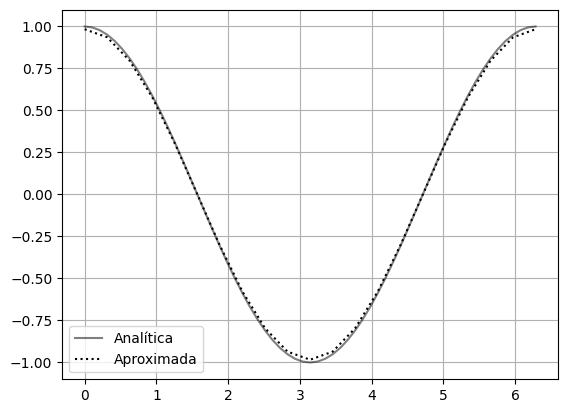

In [ ]:
plt.plot(xplot,np.cos(xplot),'-k',
         alpha=0.5,label='Analítica')
plt.plot(xi,np.gradient(f(xi),xi),':k',
         label='Aproximada')
plt.grid()
plt.legend()
plt.show()

### Derivada numérica de 2ª ordem em uma variável

Da mesma forma que a derivada primeira pode ser aproximada em termos da variação da função em dois pontos, a derivada segunda pode ser aproximada em termos da variação na derivada primeira em dois pontos. Por exemplo, considerando as expanções em série de Taylor de $f$ em torno de $x_i$ e calculando a junção em $x_{i-1}$ e $x_{i+1}$ obtemos:

$$f(x_{i-1}) = f(x_i) - hf'(x_i) + \frac{h^2f''(x_i)}{2} - \frac{h^3f'''(x_i)}{6} + \dots$$

e

$$f(x_{i+1}) = f(x_i) + hf'(x_i) + \frac{h^2f''(x_i)}{2} + \frac{h^3f'''(x_i)}{6} + \dots$$

Somando as duas equações acima obtemos:

$$f(x_{i-1}) + f(x_{i+1}) = 2f(x_i) + h^2f''(x_i) + \frac{h^4f''''(x_i)}{24} + \dots$$

que, desprezando os termos com derivadas de 4ª ordem ou maiores, nos dá a seguinte aproximação para a derivada segunda:


$$ f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2}$$

**Exemplo 2:**

Sabemos que a derivada segunda de $f(x)=sen(x)$ é $f''(x)=-sen(x)$. Vamos calcular as derivadas numericamente usando 2 pontos em torno de $x_i$  em um conjunto de 21 pontos de discretização do intervalo $[0, 2\pi]$ e comparar os gráficos e os erros médios.

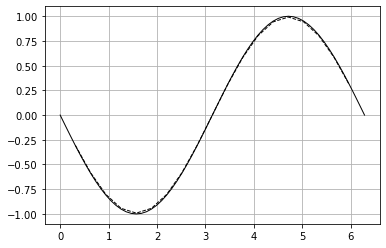

In [ ]:
# criando uma lista de pontos para o gráfico de cos(x)
x = np.linspace(0, 2*np.pi, 61)
cosx = np.cos(x)

xi = np.linspace(0, 2*np.pi, 21)
h=(xi[-1]-xi[0])/(len(xi)-1)
f = lambda x: np.sin(x)

# calculando as derivadas 2ªs numéricas com 2 pontos
dxi2 = (f(xi[2:])-2*f(xi[1:-1])+f(xi[0:-2]))/(h**2)

plt.plot(x,-np.sin(x), '-',
         xi[1:-1], dxi2, '--',
         color='k', linewidth=1)
plt.grid()

**Exemplo 3**

A derivada de $f(x)=ln(x)$ é $f'(x)=1/x$. Vamos obter as aproximações para $f'(x)$ usando a função `numpy.gradient`.

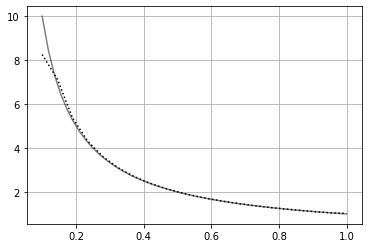

In [ ]:
# criando uma lista de pontos para o gráfico de ln(x)
x = np.linspace(0.1, 1.0)

xi = np.linspace(0.1, 1.0, 21)
h=(xi[-1]-xi[0])/(len(xi)-1)
f = lambda x: np.log(x)

# calculando as derivadas numéricas com 2 pontos
dxi2 = np.gradient(f(xi),xi)

plt.plot(x,1/x, '-k', alpha=0.5)
plt.plot(xi, dxi2, ':k')
plt.grid()

**Exemplo 4** (Adaptado de Bourden & Faires)

Em um circuito de voltagem impressa $\varepsilon(t)$ e indutância $L$, a primeira lei de Kirchhoff fornece a relação

$$\varepsilon(t) = L \frac{di}{dt} + Ri$$

Onde $R$ é a resistência do circuito e $i$ é a corrente. Suponha que alguns valores de corrente em função do tempo tenham sido medidos e os resultados são mostrados abaixo

t   | 1,00 | 1,01 | 1,02 | 1,03 | 1,04 |  
----|------|------|------|------|------|
i   | 3,10 | 3,12 | 3,14 | 3,18 | 3,24 |

onde $t$ é medido em segundos, $i$ está dado em ampères, a indutância $L$ é um valor constante de 0,98 henry e a resistência é de 0,142 ohm. Aproxime o valor da voltagem $\varepsilon(t)$ quando $t=$1,00, 1,01, 1,02, 1,03 e 1,04.


In [ ]:
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
L = 0.98
R = 0.142
eps = L*(np.gradient(i,t)) + R*i
print(eps)


[2.4002  2.40304 3.38588 5.35156 6.34008]


**Exemplo 5**

A posição $s$ de um automóvel se locomovendo em linha reta em uma estrada é mostrada na tabela abaixo para diversos instantes de tempo. Use esses dados para estimar a velocidade e a aceleração do carro entre 0 e 13 segundos.

t(s):| 0 | 3 | 5 | 8 | 10| 13|
-----|---|---|---|---|---|---|
s(m):| 0 |225|383|623|742|993|

In [ ]:
t = np.array([0.,3.,5.,8.,10.,13.])
s = np.array([0., 225., 383., 623., 742., 993.])

v = np.gradient(s,t)
print (f' Velocidade(m/s): {np.round(v,2)}')

a = np.gradient(v,t)
print (f' Aceleração(m/s²)$: {np.round(a,2)}')

 Velocidade(m/s): [75.   77.4  79.4  67.7  69.17 83.67]
 Aceleração(m/s²)$: [ 0.8   0.92 -0.96 -1.12  2.37  4.83]
